In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [84]:
data = pd.read_csv('bengaluru_house_prices.csv')
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# Data Cleaning

In [85]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [86]:
data2 = data.drop(['area_type','availability','society','balcony'], axis=1)
data2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [87]:
data2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [88]:
# on va supprimer les valeurs manquants 
data3 = data2.dropna()
data3.isnull().sum().any()

False

In [89]:
data3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [90]:
data3['bed'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\HP\AppData\Local\Temp\ipykernel_4344\1801084335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['bed'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))


In [91]:
data3.head()

,location,size,total_sqft,bath,price,bed
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [92]:
#data3.info()

In [93]:
data3['bed'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [94]:
data3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [95]:
# traitement des valeurs non unifome (xxxx-yyyy) 
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [96]:
data3[~data3['total_sqft'].apply(is_float)].head(6)

,location,size,total_sqft,bath,price,bed
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1


In [97]:
def totat_sqft_average(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        None
    

In [98]:
data4 = data3.copy()
data4['total_sqft'] = data4['total_sqft'].apply(totat_sqft_average)
data4.head()

,location,size,total_sqft,bath,price,bed
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [99]:
#data4.loc[410] # nan ??

# Feature Engineering

In [100]:
# 1 lakh in the Indian numbering system equal 100000
data5 = data4.copy()
data5['price_per_sqft'] = (data5['price']*100000) / data5['total_sqft']
data5.head()

,location,size,total_sqft,bath,price,bed,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [101]:
len(data5.location.unique())

1304

In [102]:
data5.location = data5.location.apply(lambda x : x.strip())  # nettoyé le text (remove begining space, tab,\n...)
location_state = data5.location.value_counts(ascending=False)
location_state

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [103]:
len(location_state)

1293

In [104]:
location_under_10 = location_state[location_state<=10]
location_under_10

Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [105]:
# on va réduire le dimension
data5.location = data5.location.apply(lambda x : 'Other' if x in location_under_10 else x)

In [106]:
len(data5.location.unique())

242

# Remove outliers

## 1. En utilisant Business logique

Supposons qu'une chambre (bed) equivalant à 300 square foot 

In [107]:
data6 = data5[(data5.total_sqft/data5.bed>=300)]
print(data5.shape)
print(data6.shape)

(13246, 7)
(12456, 7)


## 2. En utilisant la moyenne et l'écart type

In [108]:
data6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [109]:
def remove_outlier(data):
    df = pd.DataFrame()
    for key, subdf in data6.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        sigma = np.std(subdf.price_per_sqft)
        one_sigma_df = subdf[(subdf.price_per_sqft>(mean-sigma)) & (subdf.price_per_sqft<(mean+sigma))]
        df = pd.concat([df,one_sigma_df], ignore_index=True)
    return df

In [110]:
data7 = remove_outlier(data6)
data7.shape

(10241, 7)

In [111]:
data7.head()

,location,size,total_sqft,bath,price,bed,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [112]:
data7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'count')

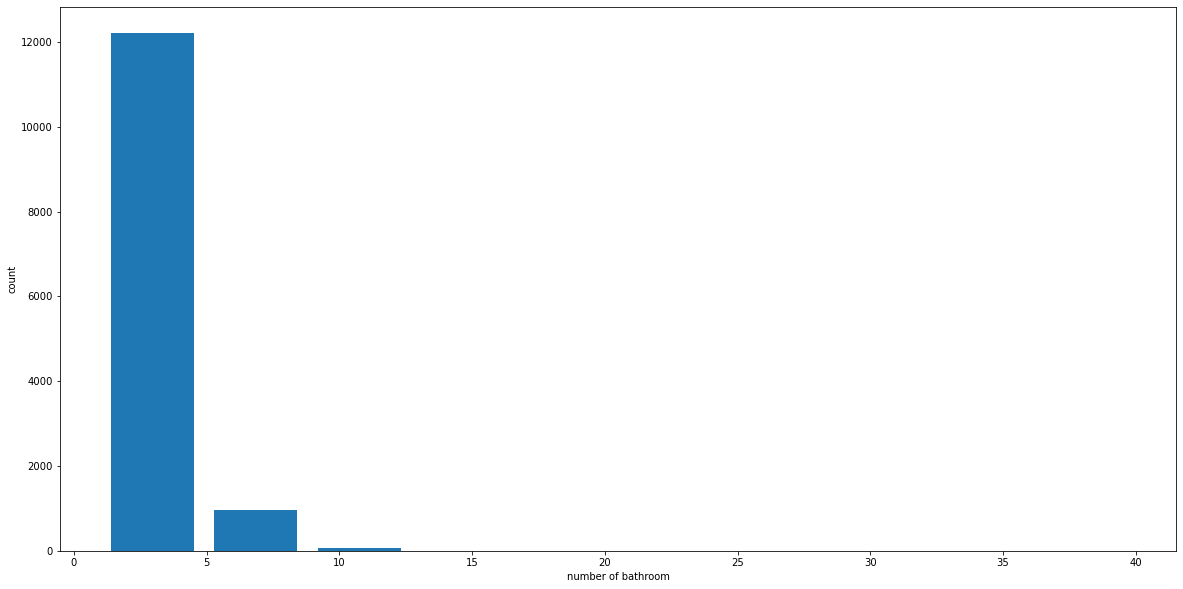

In [113]:
plt.hist(data.bath, rwidth=0.8)
plt.xlabel('number of bathroom')
plt.ylabel('count')

### on peut consider qur trouver plus de deux bathroom encore pour chaque bedroom, comme valeur abérant

In [114]:
data7[data7.bath>data7.bed + 2]

,location,size,total_sqft,bath,price,bed,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5850,Other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9012,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [115]:
data8 = data7[data7.bath < data7.bed + 2]
data8

,location,size,total_sqft,bath,price,bed,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10236,Yeshwanthpur,3 BHK,1676.0,3.0,92.13,3,5497.016706
10237,Yeshwanthpur,3 BHK,2503.0,3.0,138.00,3,5513.383939
10238,Yeshwanthpur,3 BHK,1855.0,3.0,135.00,3,7277.628032
10239,Yeshwanthpur,3 BHK,1876.0,3.0,160.00,3,8528.784648


In [116]:
data9 = data8.drop(['size','price_per_sqft'],axis='columns')
data9.head(3)

,location,total_sqft,bath,price,bed
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


# Machine Learning modeling 

In [117]:
# onehot encoding for location
dummies = pd.get_dummies(data9.location)
data10 = pd.concat([data9, dummies.drop('Other', axis=1)], axis=1)
data10.head()

,location,total_sqft,bath,price,bed,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
data11 = data10.drop('location', axis=1)
data11.head()

,total_sqft,bath,price,bed,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
X = data11.drop('price', axis='columns')
y = data11.price

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [121]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.8218987614017097

In [122]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=12)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.83838902, 0.79824847, 0.78895836, 0.74569531, 0.77956216])

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
    models = {
        'linear regression': {
            'model' : LinearRegression(),
            'params': {}           
        },
        'lasso Regressor': {
            'model' : Lasso(),
            'params':{
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'Decision tree Regressor': {
            'model' : DecisionTreeRegressor(),
            'params':{
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
           
        
    }
    model_scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=12)
    for name, config in models.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        model_scores.append({
            'model': name,
            'best params': gs.best_params_,
            'best score' : gs.best_score_
        })
    return pd.DataFrame(model_scores, columns=['model', 'best params', 'best score'])

find_best_model(X,y)
        
        
    
    

C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarn

,model,best params,best score
0,linear regression,{},0.790171
1,lasso Regressor,"{'alpha': 1, 'selection': 'random'}",0.661800
2,Decision tree Regressor,"{'criterion': 'friedman_mse', 'splitter': 'ran...",0.686681


In [129]:
X.head()

,total_sqft,bath,bed,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
def price_prediction(sqft,bath,bed,location):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bed
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_model.predict([x])[0]
    

In [141]:
price_prediction(1000,2,2, '1st Block Jayanagar')

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


206.53760159510696

## importer le model en un fichier pickle 

In [142]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_model,f)


In [143]:
# importer les noms des colonne 
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))